# EDA

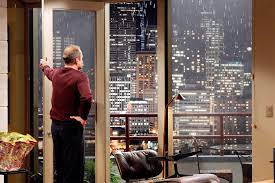

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.float_format', lambda x: '%g' % x)

## Reading and understanding the data

In [2]:
#importing the data from a csv-file
df = pd.read_csv('data/eda.csv')
df.head()

date  price    house_id  id        id.1  bedrooms  bathrooms  \
0  2014-10-13 221900  7129300520   1  7129300520         3          1   
1  2014-12-09 538000  6414100192   2  6414100192         3       2.25   
2  2015-02-25 180000  5631500400   3  5631500400         2          1   
3  2014-12-09 604000  2487200875   4  2487200875         4          3   
4  2015-02-18 510000  1954400510   5  1954400510         3          2   

   sqft_living  sqft_lot  floors  ...  grade  sqft_above  sqft_basement  \
0         1180      5650       1  ...      7        1180              0   
1         2570      7242       2  ...      7        2170            400   
2          770     10000       1  ...      6         770              0   
3         1960      5000       1  ...      7        1050            910   
4         1680      8080       1  ...      8        1680              0   

   yr_built  yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.5112 -122.257           1340        5650  
1      1951         19910    98125  47.721 -122.319           1690        7639  
2      1933           NaN    98028 47.7379 -122.233           2720        8062  
3      1965             0    98136 47.5208 -122.393           1360        5000  
4      1987             0    98074 47.6168 -122.045           1800        7503  

[5 rows x 23 columns]

In [3]:
# exploring the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [4]:
df.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe()

price    house_id      id        id.1  bedrooms  bathrooms  \
count   21597       21597   21597       21597     21597      21597   
mean   540297 4.58047e+09   10799 4.58047e+09    3.3732    2.11583   
std    367368 2.87674e+09 6234.66 2.87674e+09  0.926299   0.768984   
min     78000  1.0001e+06       1  1.0001e+06         1        0.5   
25%    322000 2.12305e+09    5400 2.12305e+09         3       1.75   
50%    450000 3.90493e+09   10799 3.90493e+09         3       2.25   
75%    645000  7.3089e+09   16198  7.3089e+09         4        2.5   
max   7.7e+06     9.9e+09   21597     9.9e+09        33          8   

       sqft_living    sqft_lot   floors  waterfront  ...   grade  sqft_above  \
count        21597       21597    21597       19206  ...   21597       21597   
mean       2080.32     15099.4   1.4941  0.00760179  ... 7.65792      1788.6   
std        918.106     41412.6 0.539683   0.0868585  ...  1.1732      827.76   
min            370         520        1           0  ...       3         370   
25%           1430        5040        1           0  ...       7        1190   
50%           1910        7618      1.5           0  ...       7        1560   
75%           2550       10685        2           0  ...       8        2210   
max          13540 1.65136e+06      3.5           1  ...      13        9410   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
count          21145     21597         17749    21597    21597    21597   
mean         291.857      1971       836.651    98078  47.5601 -122.214   
std          442.491   29.3752       4000.11  53.5131 0.138552 0.140724   
min                0      1900             0    98001  47.1559 -122.519   
25%                0      1951             0    98033  47.4711 -122.328   
50%                0      1975             0    98065  47.5718 -122.231   
75%              560      1997             0    98118   47.678 -122.125   
max             4820      2015         20150    98199  47.7776 -121.315   

       sqft_living15  sqft_lot15  
count          21597       21597  
mean         1986.62     12758.3  
std           685.23     27274.4  
min              399         651  
25%             1490        5100  
50%             1840        7620  
75%             2360       10083  
max             6210      871200  

[8 rows x 22 columns]

### First impressions of the data

Data looks fine, meanning there are no big dicrepancies.
- The format of the columns names is  correct
- Only 4 columns out of 23 has Null values
- The datatype of some columns need to be changed


## Exploring and cleaning the Data

##### Dropping extra 'id' columns and rearranging the order

In [6]:
df.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.drop(['house_id', 'id.1'], axis=1, inplace=True)                                     # dropping unwanted columns
                                
df.rename(columns={'id' : 'house_id'}, inplace=True)                                    # renaming the 'id' column for 'house_id'

df = df[['house_id', 'date', 'price', 'bedrooms', 'bathrooms',                          # reordering the columns, so 'house_id' comes first
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

df.head(1)

house_id        date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0         1  2014-10-13 221900         3          1         1180      5650   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0       1         NaN     0  ...      7        1180              0      1955   

   yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15  
0             0    98178 47.5112 -122.257           1340        5650  

[1 rows x 21 columns]

##### Checking for duplicated rows

In [8]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

##### Adjusting datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Lets start changing the 'date' column into a daytime datatyp

In [10]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

extra 0 strip

In [11]:
df['yr_renovated'].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [12]:
df['yr_renovated'] = df['yr_renovated'].astype('Int64').astype(str).str[:-1].astype('Int64', errors='ignore') # to str

In [13]:
df['yr_renovated'].unique()

array(['', '1991', '<NA', '2002', '2010', '1992', '2013', '1994', '1978',
       '2005', '2003', '1984', '1954', '2014', '2011', '1983', '1945',
       '1990', '1988', '1977', '1981', '1995', '2000', '1999', '1998',
       '1970', '1989', '2004', '1986', '2007', '1987', '2006', '1985',
       '2001', '1980', '1971', '1979', '1997', '1950', '1969', '1948',
       '2009', '2015', '1974', '2008', '1968', '2012', '1963', '1951',
       '1962', '1953', '1993', '1996', '1955', '1982', '1956', '1940',
       '1976', '1946', '1975', '1964', '1973', '1957', '1959', '1960',
       '1967', '1965', '1934', '1972', '1944', '1958'], dtype=object)

In [14]:
#df['yr_renovated'] = df['yr_renovated'].astype(str).str[:-1].astype('Int64', errors='ignore')

In [15]:
df['yr_built'] = pd.to_datetime(df['yr_built'].astype('Int32'), format='%Y').dt.year    #to int32
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'].astype('Int32', errors='ignore'), format='%Y', errors='coerce').dt.year

In [16]:
#df['yr_built'] = df['yr_built'].astype('Int32')
#df['yr_renovated'] = df['yr_renovated'].astype('Int32', errors='ignore')

In [17]:

#df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y').dt.year
#df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], format='%Y', errors='coerce').dt.year

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  float64       
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  float64       
 6   sqft_lot       21597 non-null  float64       
 7   floors         21597 non-null  float64       
 8   waterfront     19206 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  float64       
 13  sqft_basement  21145 non-null  float64       
 14  yr_built       21597 non-null  int32         
 15  yr_renovated   744 

In [19]:
df.head()

house_id       date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0         1 2014-10-13 221900         3          1         1180      5650   
1         2 2014-12-09 538000         3       2.25         2570      7242   
2         3 2015-02-25 180000         2          1          770     10000   
3         4 2014-12-09 604000         4          3         1960      5000   
4         5 2015-02-18 510000         3          2         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0       1         NaN     0  ...      7        1180              0      1955   
1       2           0     0  ...      7        2170            400      1951   
2       1           0     0  ...      6         770              0      1933   
3       1           0     0  ...      7        1050            910      1965   
4       1           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15  
0           NaN    98178 47.5112 -122.257           1340        5650  
1          1991    98125  47.721 -122.319           1690        7639  
2           NaN    98028 47.7379 -122.233           2720        8062  
3           NaN    98136 47.5208 -122.393           1360        5000  
4           NaN    98074 47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

## Descriptic statistics

### Checking for null values

In [20]:
df.isna().sum()

house_id             0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2391
view                63
condition            0
grade                0
sqft_above           0
sqft_basement      452
yr_built             0
yr_renovated     20853
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [21]:
print(f"'waterfront' unique values = {df['waterfront'].unique()}")
print(f"'view' unique values = {df['view'].unique()}")
print(f"'yr_renovated' unique values = {df['yr_renovated'].unique()}")

'waterfront' unique values = [nan  0.  1.]
'view' unique values = [ 0. nan  3.  4.  2.  1.]
'yr_renovated' unique values = [  nan 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


no calculations

In [22]:
print(f"'yr_renovated' unique values = {df['yr_renovated'].unique()}")

'yr_renovated' unique values = [  nan 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


numeric values

In [23]:
df.columns

Index(['house_id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].describe()

price  bedrooms  bathrooms  sqft_living    sqft_lot   floors  \
count   21597     21597      21597        21597       21597    21597   
mean   540297    3.3732    2.11583      2080.32     15099.4   1.4941   
std    367368  0.926299   0.768984      918.106     41412.6 0.539683   
min     78000         1        0.5          370         520        1   
25%    322000         3       1.75         1430        5040        1   
50%    450000         3       2.25         1910        7618      1.5   
75%    645000         4        2.5         2550       10685        2   
max   7.7e+06        33          8        13540 1.65136e+06      3.5   

       condition   grade  sqft_above  sqft_basement  sqft_living15  sqft_lot15  
count      21597   21597       21597          21145          21597       21597  
mean     3.40983 7.65792      1788.6        291.857        1986.62     12758.3  
std     0.650546  1.1732      827.76        442.491         685.23     27274.4  
min            1       3         370              0            399         651  
25%            3       7        1190              0           1490        5100  
50%            3       7        1560              0           1840        7620  
75%            4       8        2210            560           2360       10083  
max            5      13        9410           4820           6210      871200

In [25]:
df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']].corr().round(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price              1      0.31       0.53          0.7      0.09    0.26   
bedrooms        0.31         1       0.51         0.58      0.03    0.18   
bathrooms       0.53      0.51          1         0.76      0.09     0.5   
sqft_living      0.7      0.58       0.76            1      0.17    0.35   
sqft_lot        0.09      0.03       0.09         0.17         1      -0   
floors          0.26      0.18        0.5         0.35        -0       1   
waterfront      0.28        -0       0.07         0.11      0.02    0.02   
view             0.4      0.08       0.19         0.28      0.08    0.03   
condition       0.04      0.03      -0.13        -0.06     -0.01   -0.26   
grade           0.67      0.36       0.67         0.76      0.11    0.46   
sqft_above      0.61      0.48       0.69         0.88      0.18    0.52   
sqft_basement   0.32       0.3       0.28         0.43      0.02   -0.25   
yr_built        0.05      0.16       0.51         0.32      0.05    0.49   
sqft_living15   0.59      0.39       0.57         0.76      0.14    0.28   
sqft_lot15      0.08      0.03       0.09         0.18      0.72   -0.01   

               waterfront  view  condition  grade  sqft_above  sqft_basement  \
price                0.28   0.4       0.04   0.67        0.61           0.32   
bedrooms               -0  0.08       0.03   0.36        0.48            0.3   
bathrooms            0.07  0.19      -0.13   0.67        0.69           0.28   
sqft_living          0.11  0.28      -0.06   0.76        0.88           0.43   
sqft_lot             0.02  0.08      -0.01   0.11        0.18           0.02   
floors               0.02  0.03      -0.26   0.46        0.52          -0.25   
waterfront              1  0.41       0.02   0.09        0.08           0.09   
view                 0.41     1       0.05   0.25        0.17           0.28   
condition            0.02  0.05          1  -0.15       -0.16           0.17   
grade                0.09  0.25      -0.15      1        0.76           0.17   
sqft_above           0.08  0.17      -0.16   0.76           1          -0.05   
sqft_basement        0.09  0.28       0.17   0.17       -0.05              1   
yr_built            -0.03 -0.05      -0.36   0.45        0.42          -0.13   
sqft_living15        0.09  0.28      -0.09   0.71        0.73            0.2   
sqft_lot15           0.03  0.07         -0   0.12         0.2           0.02   

               yr_built  sqft_living15  sqft_lot15  
price              0.05           0.59        0.08  
bedrooms           0.16           0.39        0.03  
bathrooms          0.51           0.57        0.09  
sqft_living        0.32           0.76        0.18  
sqft_lot           0.05           0.14        0.72  
floors             0.49           0.28       -0.01  
waterfront        -0.03           0.09        0.03  
view              -0.05           0.28        0.07  
condition         -0.36          -0.09          -0  
grade              0.45           0.71        0.12  
sqft_above         0.42           0.73         0.2  
sqft_basement     -0.13            0.2        0.02  
yr_built              1           0.33        0.07  
sqft_living15      0.33              1        0.18  
sqft_lot15         0.07           0.18           1

There are too many 0 an the 'sqft_basement' column, this is messing with the data

In [26]:
df.query('sqft_basement != 0').count()

house_id         8770
date             8770
price            8770
bedrooms         8770
bathrooms        8770
sqft_living      8770
sqft_lot         8770
floors           8770
waterfront       7807
view             8735
condition        8770
grade            8770
sqft_above       8770
sqft_basement    8318
yr_built         8770
yr_renovated      393
zipcode          8770
lat              8770
long             8770
sqft_living15    8770
sqft_lot15       8770
dtype: int64

In [27]:
df.query('sqft_basement == 0').count()

house_id         12827
date             12827
price            12827
bedrooms         12827
bathrooms        12827
sqft_living      12827
sqft_lot         12827
floors           12827
waterfront       11399
view             12799
condition        12827
grade            12827
sqft_above       12827
sqft_basement    12827
yr_built         12827
yr_renovated       351
zipcode          12827
lat              12827
long             12827
sqft_living15    12827
sqft_lot15       12827
dtype: int64

Checking how diferent would be the data by adding the mean value to those '0' in that particular column

In [28]:

df[df['sqft_basement'].isna()].count()

house_id         452
date             452
price            452
bedrooms         452
bathrooms        452
sqft_living      452
sqft_lot         452
floors           452
waterfront       415
view             450
condition        452
grade            452
sqft_above       452
sqft_basement      0
yr_built         452
yr_renovated      21
zipcode          452
lat              452
long             452
sqft_living15    452
sqft_lot15       452
dtype: int64

In [29]:
df['sqft_basement'].replace(0, np.nan).fillna(df['sqft_basement'].mean()).mean()

465.1985496396057

In [30]:
df['sqft_basement'].replace(0, np.nan).mean()

741.9236595335417

In [31]:
df[df['sqft_basement'] != 0]['sqft_basement'].mean()

741.9236595335417

In [32]:
df['sqft_basement'].replace(0, np.nan).mean(skipna=False)

nan

Creating  two diferent sets

In [33]:
df_with_basement = df.query('sqft_basement != 0 or sqft_basement != sqft_basement.isna()')
df_with_basement.describe()

house_id                           date   price  bedrooms  bathrooms  \
count      8770                           8770    8770      8770       8770   
mean    10632.7  2014-10-28 01:05:30.855187968  618167    3.5504    2.26226   
min           2            2014-05-02 00:00:00  100000         1        0.5   
25%     5292.75            2014-07-21 00:00:00  372000         3       1.75   
50%     10644.5            2014-10-15 00:00:00  510625         3       2.25   
75%     15848.2            2015-02-13 00:00:00  709988         4       2.75   
max       21592            2015-05-27 00:00:00 7.7e+06        33          8   
std     6158.78                            NaN  439135   1.00881   0.778601   

       sqft_living    sqft_lot   floors  waterfront     view  ...   grade  \
count         8770        8770     8770        7807     8735  ...    8770   
mean       2300.05     13398.5  1.33198   0.0120405 0.398168  ... 7.72828   
min            600         572        1           0        0  ...       4   
25%           1670        5000        1           0        0  ...       7   
50%           2100        7505        1           0        0  ...       7   
75%           2700     10659.8        2           0        0  ...       8   
max          13540 1.07422e+06      3.5           1        4  ...      13   
std          952.3     34002.9 0.482878    0.109073 0.971377  ... 1.11263   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
count        8770           8318      8770           393     8770     8770   
mean      1581.65        741.924   1965.17       1998.03  98088.4  47.5823   
min           480             10      1900          1934    98001  47.1775   
25%          1120            450      1947          1990    98034  47.5189   
50%          1380            700      1967          2002    98105   47.595   
75%          1800            980      1984          2009    98125  47.6792   
max          9410           4820      2015          2015    98199  47.7776   
std       726.363        404.741   28.5577       14.8281  55.5582 0.123301   

          long  sqft_living15  sqft_lot15  
count     8770           8770        8770  
mean  -122.254        2021.68     11441.1  
min   -122.514            460         651  
25%   -122.351           1550        5000  
50%   -122.288           1880      7545.5  
75%   -122.177           2330     10013.5  
max   -121.321           6110      871200  
std   0.120672        664.064     23864.4  

[8 rows x 21 columns]

In [34]:
df_wto_basement = df.query('sqft_basement == 0 or sqft_basement.isna()')
df_wto_basement.describe()

house_id                           date    price  bedrooms  bathrooms  \
count     13279                          13279    13279     13279      13279   
mean      10919  2014-10-29 15:06:34.457413888   488482    3.2571    2.01862   
min           1            2014-05-02 00:00:00    78000         1        0.5   
25%      5501.5            2014-07-22 00:00:00   299950         3        1.5   
50%       10910            2014-10-17 00:00:00   415000         3          2   
75%     16388.5            2015-02-17 00:00:00   597278         4        2.5   
max       21597            2015-05-15 00:00:00 4.49e+06         9        7.5   
std     6276.98                            NaN   298733  0.849686   0.747408   

       sqft_living    sqft_lot  floors  waterfront     view  ...   grade  \
count        13279       13279   13279       11814    13249  ...   13279   
mean       1934.15     16243.7 1.60193  0.00474014 0.126425  ... 7.61089   
min            370         520       1           0        0  ...       3   
25%           1280      5138.5       1           0        0  ...       7   
50%           1750        7649       2           0        0  ...       7   
75%           2440     10684.5       2           0        0  ...       8   
max           8020 1.65136e+06     3.5           1        4  ...      13   
std        863.823     45912.6 0.54902   0.0686882  0.56834  ... 1.20782   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
count       13279          12827     13279           372    13279    13279   
mean      1924.43              0   1974.82       1993.46  98071.2  47.5451   
min           370              0      1900          1940    98001  47.1559   
25%          1270              0      1954          1985    98031  47.4358   
50%          1740              0      1981          1997    98058  47.5535   
75%          2430              0      2000          2006    98115  47.6761   
max          8020              0      2015          2015    98199  47.7776   
std       860.651              0   29.3605       16.3785  50.9394 0.145836   

          long  sqft_living15  sqft_lot15  
count    13279          13279       13279  
mean  -122.188        1962.49     13660.1  
min   -122.519            399         659  
25%   -122.312           1440      5194.5  
50%   -122.195           1800        7650  
75%   -122.084           2380     10124.5  
max   -121.315           6210      858132  
std    0.14701         697.23     29434.3  

[8 rows x 21 columns]

In [35]:
print(f"'sqft_basement w' unique values = {df_with_basement['sqft_basement'].unique()}")
print(f"'sqft_basement wo' unique values = {df_wto_basement['sqft_basement'].unique()}")

'sqft_basement w' unique values = [ 400.  910. 1530.   nan  730. 1700.  300.  970.  760.  720.  700.  820.
  780.  790.  330. 1620.  360.  588. 1510.  410.  990.  600.  560.  550.
 1000. 1600.  500. 1040.  880. 1010.  240.  265.  290.  800.  540.  710.
  840.  380.  770.  480.  570. 1490.  620. 1250. 1270.  120.  650.  180.
 1130.  450. 1640. 1460. 1020. 1030.  750.  640. 1070.  490. 1310.  630.
 2000.  390.  430.  850.  210. 1430. 1950.  440.  220. 1160.  860.  580.
 2060. 1820. 1180.  200. 1150. 1200.  680.  530. 1450. 1170. 1080.  960.
  280.  870. 1100.  460. 1400.  660. 1220.  900.  420. 1580. 1380.  475.
  690.  270.  350.  935. 1370.  980. 1470.  160.  950.   50.  740. 1780.
 1900.  340.  470.  370.  140. 1760.  130.  520.  890. 1110.  150. 1720.
  810.  190. 1290.  670. 1800. 1120. 1810.   60. 1050.  940.  310.  930.
 1390.  610. 1830. 1300.  510. 1330. 1590.  920. 1320. 1420. 1240. 1960.
 1560. 2020. 1190. 2110. 1280.  250. 2390. 1230.  170.  830. 1260. 1410.
 1340.  590. 1500

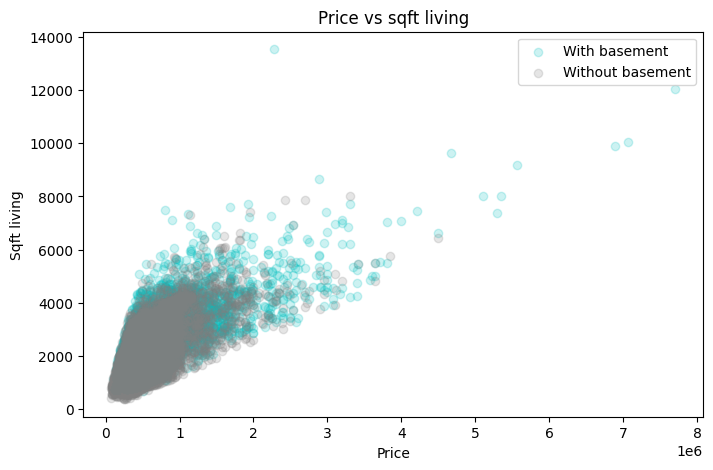

In [71]:
plt.scatter(df_with_basement['price'], df_with_basement['sqft_living'], label= 'With basement', color='c', alpha=0.2)
plt.scatter(df_wto_basement['price'], df_wto_basement['sqft_living'], label= 'Without basement', color='grey', alpha=0.2)
plt.title('Price vs sqft living')
plt.xlabel('Price')
plt.ylabel('Sqft living')
plt.legend()
plt.show()

In [72]:
print(df_with_basement.count().sum())
print(df_wto_basement.count().sum())

174343
264005


We can see that there are more houses without, and also most of the are at the economic side of the graph

Now I will filter by price quitilles, so I can select the most economic values for my client

In [73]:
df_low = df.query('price <= price.quantile(0.25)')
df_med = df.query('price <= price.quantile(0.5)')
df_high = df.query('price > price.quantile(0.5)')

In [38]:
df_med.corr().round(2)

house_id  date  price  bedrooms  bathrooms  sqft_living  \
house_id              1     0   0.06     -0.01       0.09         0.01   
date                  0     1   0.01         0      -0.01           -0   
price              0.06  0.01      1       0.2       0.34         0.38   
bedrooms          -0.01     0    0.2         1       0.48         0.65   
bathrooms          0.09 -0.01   0.34      0.48          1         0.68   
sqft_living        0.01    -0   0.38      0.65       0.68            1   
sqft_lot          -0.03    -0   0.03     -0.02      -0.05         0.02   
floors             0.18    -0   0.25      0.14       0.52          0.3   
waterfront            0 -0.01   0.03     -0.03      -0.03        -0.02   
view              -0.01     0   0.07     -0.01          0         0.04   
condition         -0.07 -0.03  -0.03      0.03      -0.15        -0.06   
grade              0.07 -0.02    0.4      0.32       0.56         0.56   
sqft_above         0.05     0   0.32      0.52       0.61         0.81   
sqft_basement     -0.05    -0   0.14      0.28       0.19         0.42   
yr_built           0.17  0.01   0.22      0.23       0.64         0.39   
yr_renovated      -0.02 -0.06   0.04      0.12       0.27         0.02   
zipcode            0.01 -0.02   0.04     -0.16      -0.24        -0.23   
lat                0.02 -0.05   0.35     -0.23      -0.27        -0.32   
long              -0.03  0.02   0.04      0.08       0.15         0.14   
sqft_living15      0.01     0   0.32      0.36       0.49         0.65   
sqft_lot15        -0.03 -0.01   0.02     -0.02      -0.05         0.03   

               sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
house_id          -0.03    0.18           0 -0.01  ...   0.07        0.05   
date                 -0      -0       -0.01     0  ...  -0.02           0   
price              0.03    0.25        0.03  0.07  ...    0.4        0.32   
bedrooms          -0.02    0.14       -0.03 -0.01  ...   0.32        0.52   
bathrooms         -0.05    0.52       -0.03     0  ...   0.56        0.61   
sqft_living        0.02     0.3       -0.02  0.04  ...   0.56        0.81   
sqft_lot              1    -0.1        0.02   0.1  ...  -0.06        0.02   
floors             -0.1       1       -0.01 -0.05  ...    0.4         0.5   
waterfront         0.02   -0.01           1  0.31  ...  -0.03       -0.02   
view                0.1   -0.05        0.31     1  ...     -0       -0.01   
condition          0.02   -0.26        0.02  0.03  ...  -0.15       -0.12   
grade             -0.06     0.4       -0.03    -0  ...      1        0.55   
sqft_above         0.02     0.5       -0.02 -0.01  ...   0.55           1   
sqft_basement      0.01   -0.28       -0.01  0.08  ...   0.08       -0.19   
yr_built          -0.07    0.57       -0.02 -0.06  ...   0.59        0.47   
yr_renovated         -0      -0         NaN -0.03  ...   0.24        -0.1   
zipcode           -0.09   -0.09        0.01  0.05  ...  -0.19        -0.3   
lat               -0.07   -0.04       -0.01 -0.06  ...  -0.18       -0.34   
long               0.18    0.08       -0.05  0.01  ...   0.05        0.23   
sqft_living15       0.1    0.23           0   0.1  ...   0.49        0.62   
sqft_lot15         0.57   -0.12        0.04   0.1  ...  -0.05        0.03   

               sqft_basement  yr_built  yr_renovated  zipcode   lat  long  \
house_id               -0.05      0.17         -0.02     0.01  0.02 -0.03   
date                      -0      0.01         -0.06    -0.02 -0.05  0.02   
price                   0.14      0.22          0.04     0.04  0.35  0.04   
bedrooms                0.28      0.23          0.12    -0.16 -0.23  0.08   
bathrooms               0.19      0.64          0.27    -0.24 -0.27  0.15   
sqft_living             0.42      0.39          0.02    -0.23 -0.32  0.14   
sqft_lot                0.01     -0.07            -0    -0.09 -0.07  0.18   
floors                 -0.28      0.57            -0    -0.09 -0.04  0.08  

In [39]:
df[['price', 'sqft_living',
        'sqft_above', 'sqft_living15', 'grade', ]].corr().round(2)

price  sqft_living  sqft_above  sqft_living15  grade
price              1          0.7        0.61           0.59   0.67
sqft_living      0.7            1        0.88           0.76   0.76
sqft_above      0.61         0.88           1           0.73   0.76
sqft_living15   0.59         0.76        0.73              1   0.71
grade           0.67         0.76        0.76           0.71      1

In [40]:
df_with_basement[['price', 'sqft_living',
        'sqft_above', 'sqft_living15', 'grade', ]].corr().round(2)

price  sqft_living  sqft_above  sqft_living15  grade
price              1         0.71         0.7            0.6   0.69
sqft_living     0.71            1        0.91           0.72   0.73
sqft_above       0.7         0.91           1           0.68   0.76
sqft_living15    0.6         0.72        0.68              1   0.68
grade           0.69         0.73        0.76           0.68      1

In [41]:
df_wto_basement[['price', 'sqft_living',
        'sqft_above', 'sqft_living15', 'grade', ]].corr().round(2)

price  sqft_living  sqft_above  sqft_living15  grade
price              1         0.68        0.68            0.6   0.69
sqft_living     0.68            1        0.99            0.8    0.8
sqft_above      0.68         0.99           1            0.8    0.8
sqft_living15    0.6          0.8         0.8              1   0.73
grade           0.69          0.8         0.8           0.73      1

In [42]:
df_low[['price', 'sqft_living',
        'sqft_above', 'sqft_living15', 'grade', ]].corr().round(2)

price  sqft_living  sqft_above  sqft_living15  grade
price              1         0.41        0.35           0.33   0.38
sqft_living     0.41            1        0.79            0.6   0.55
sqft_above      0.35         0.79           1           0.54   0.51
sqft_living15   0.33          0.6        0.54              1   0.46
grade           0.38         0.55        0.51           0.46      1

In [43]:
df_med[['price', 'sqft_living',
        'sqft_above', 'sqft_living15', 'grade', ]].corr().round(2)

price  sqft_living  sqft_above  sqft_living15  grade
price              1         0.38        0.32           0.32    0.4
sqft_living     0.38            1        0.81           0.65   0.56
sqft_above      0.32         0.81           1           0.62   0.55
sqft_living15   0.32         0.65        0.62              1   0.49
grade            0.4         0.56        0.55           0.49      1

In [44]:
df_high[['price', 'sqft_living',
        'sqft_above', 'sqft_living15', 'grade', ]].corr().round(2)

price  sqft_living  sqft_above  sqft_living15  grade
price              1         0.64        0.53           0.48   0.58
sqft_living     0.64            1        0.86           0.69   0.73
sqft_above      0.53         0.86           1           0.68   0.74
sqft_living15   0.48         0.69        0.68              1   0.67
grade           0.58         0.73        0.74           0.67      1

In [45]:
df.columns

Index(['house_id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

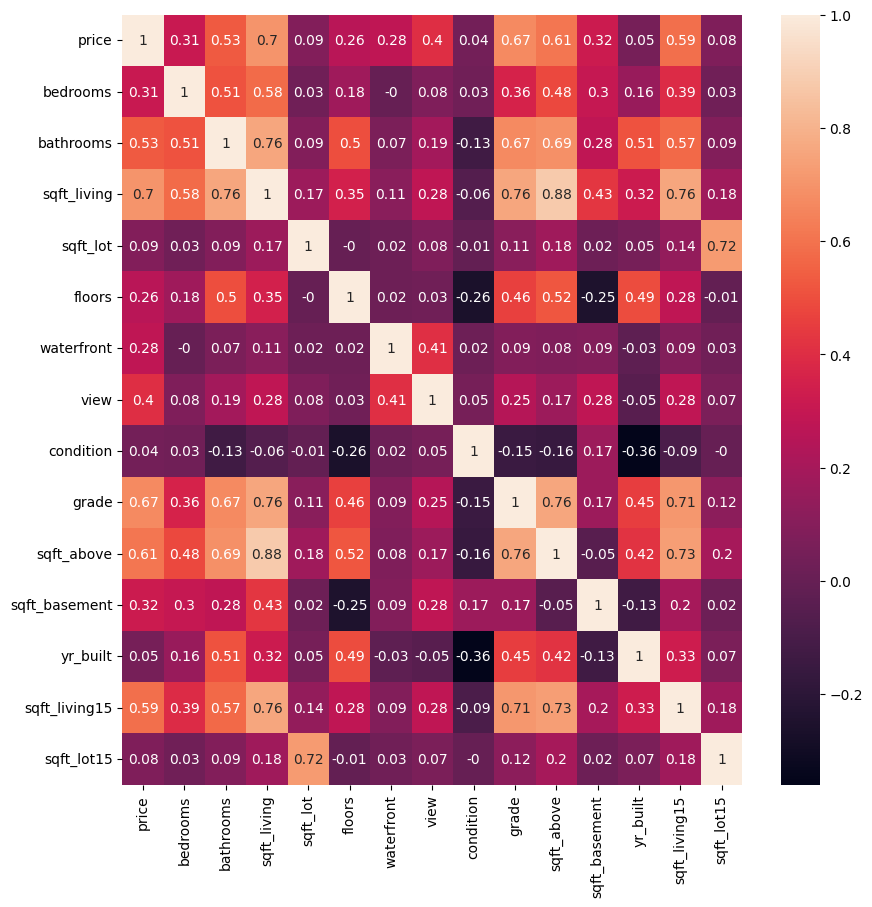

In [46]:
price_corr = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']].corr().round(2)

plt.figure(figsize=(10, 10))
plot = sns.heatmap(price_corr, annot=True)

Prices has positive correlation with 'sqft_living', 'grade', 'sqft_above', 'sqft_living15' and 'bathrooms'.
Now I'll use the basement filtered datasets to see if there is any diference

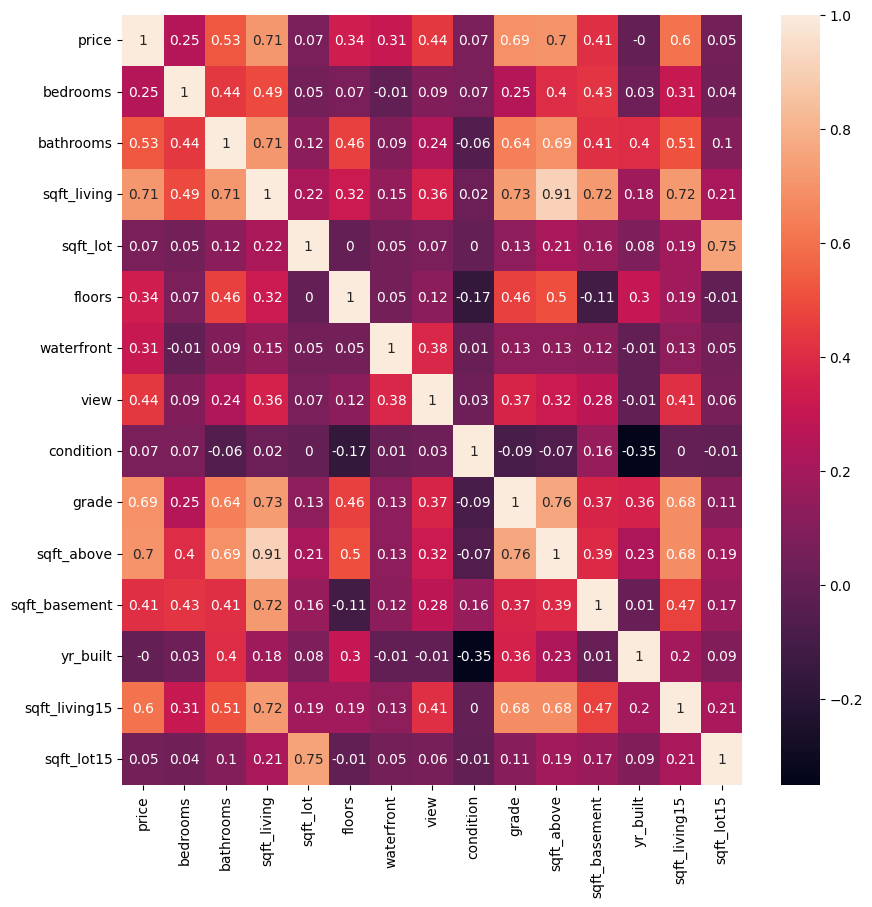

In [47]:
price_corr_with = df_with_basement[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']].corr().round(2)

plt.figure(figsize=(10, 10))
plot = sns.heatmap(price_corr_with, annot=True)

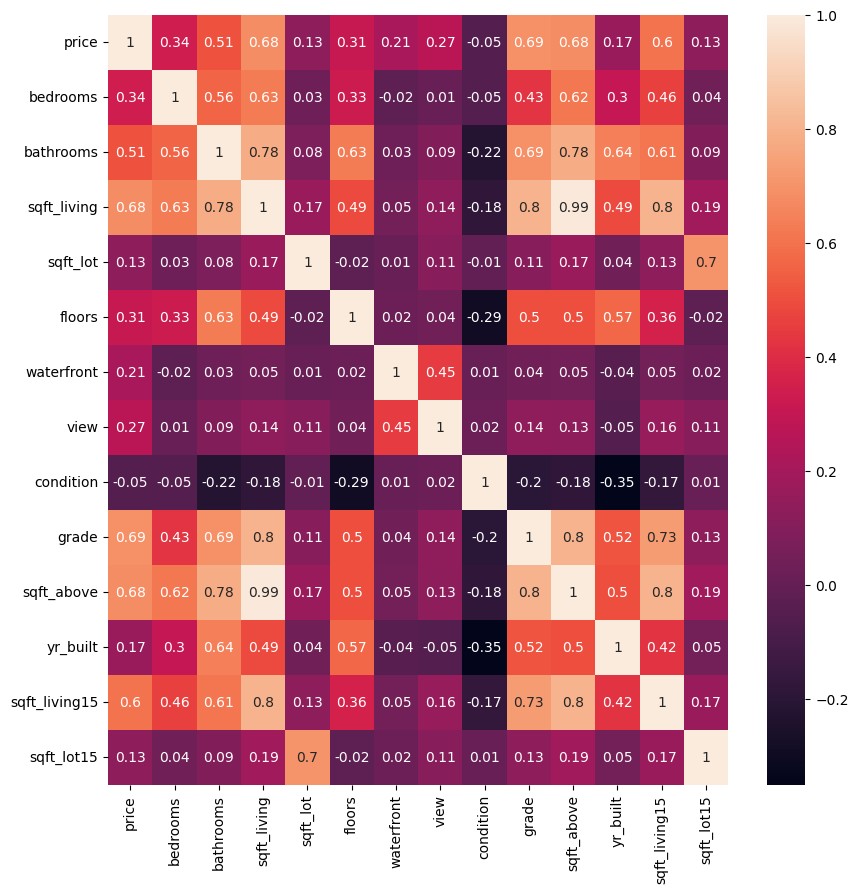

In [48]:
price_corr_wto = df_wto_basement[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']].corr().round(2)

plt.figure(figsize=(10, 10))
plot = sns.heatmap(price_corr_wto, annot=True)

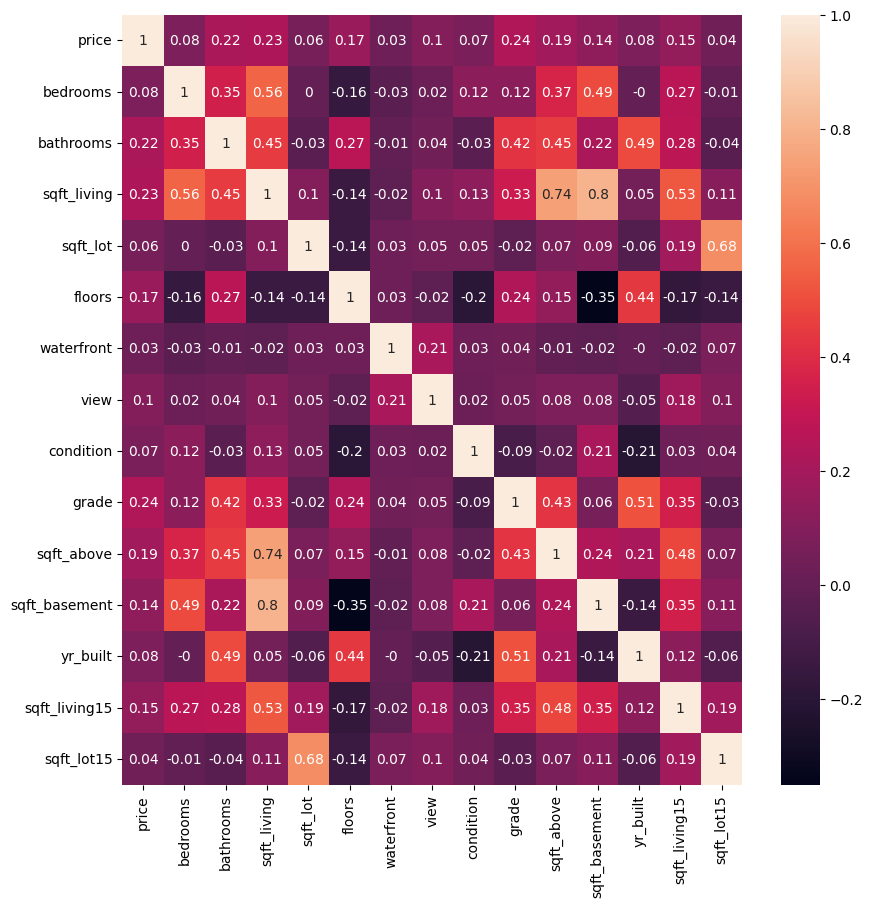

In [49]:
df_med_w = df_med.query('sqft_basement != 0 or sqft_basement != sqft_basement.isna()')

price_corr_med_w = df_med_w[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']].corr().round(2)

plt.figure(figsize=(10, 10))
plot = sns.heatmap(price_corr_med_w, annot=True)

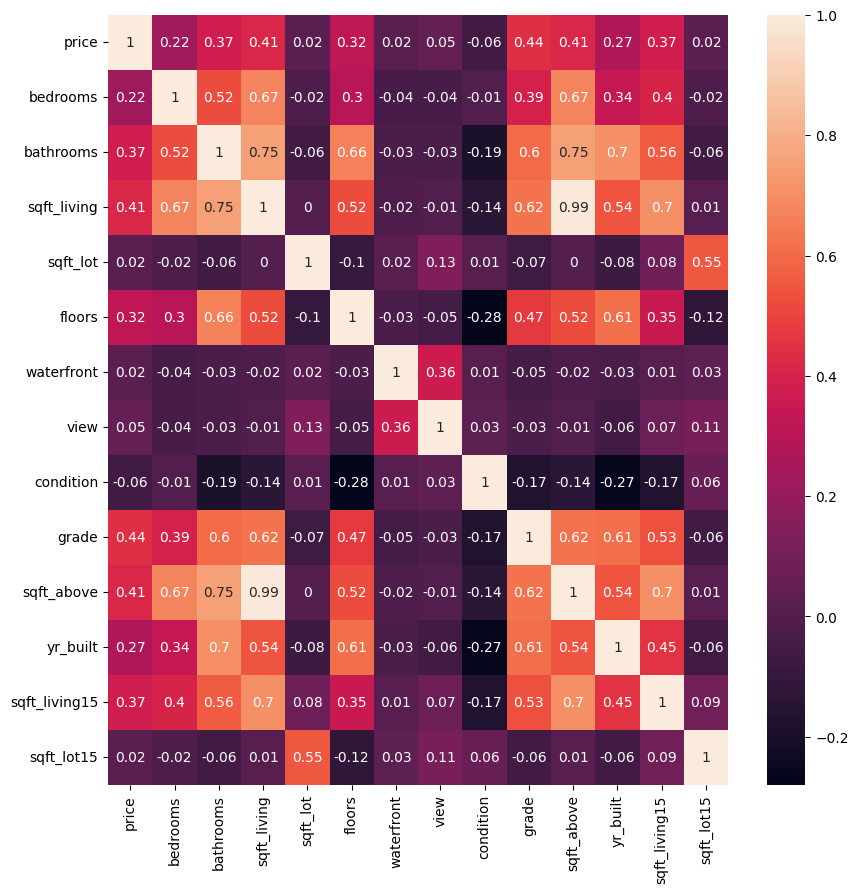

In [50]:
df_med_wo = df_med.query('sqft_basement == 0 or sqft_basement.isna()')

price_corr_med_wo = df_med_wo[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']].corr().round(2)

plt.figure(figsize=(10, 10))
plot = sns.heatmap(price_corr_med_wo, annot=True)

In [51]:
df_med_wo['price'].max()

399895.0

After the correlations, I got better understanding of the data

#### Hypothesis

- There has to be a correlation between prices and condition of the house
- Same with the grading
- It might be interesting to find where those houses are located

### Plotting by groups in order to find the best values

For that I will use de dataframe with the the prices below the mean

checking the values again

In [56]:
df_med[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']].describe()

price  bedrooms  bathrooms  sqft_living    sqft_lot   floors  \
count    8639      8639       8639         8639        8639     8639   
mean   291798   3.11205    1.76977      1575.27     11014.2  1.34489   
std   65728.2  0.825862   0.641586      534.397     25668.7 0.499554   
min     78000         1        0.5          370         572        1   
25%    245000         3          1         1180        5525        1   
50%    298900         3       1.75         1510        7647        1   
75%    345000         4        2.5         1920        9748        2   
max    399895         8       5.25         3800 1.16479e+06        3   

       waterfront      view  condition    grade  sqft_above  yr_built  \
count        7665      8615       8639     8639        8639      8639   
mean   0.00104371 0.0566454    3.38731  6.97199     1404.78   1969.92   
std     0.0322917  0.357083   0.639088 0.766515      494.14   26.1235   
min             0         0          1        3         370      1900   
25%             0         0          3        7        1050      1953   
50%             0         0          3        7        1300      1969   
75%             0         0          4        7        1670      1991   
max             1         4          5       10        3597      2015   

       sqft_living15  sqft_lot15  
count           8639        8639  
mean         1633.79     10214.6  
std          427.032     19454.7  
min              460         651  
25%             1320      5674.5  
50%             1570        7669  
75%             1900        9440  
max             3610      392040

<Axes: xlabel='price', ylabel='Count'>

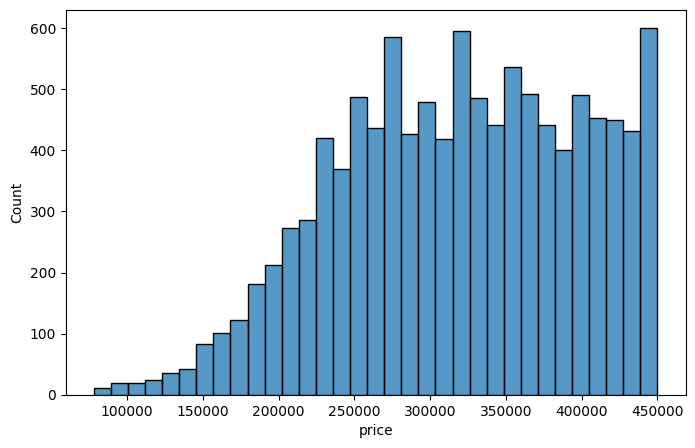

In [76]:
sns.histplot(data=df_med, x='price')

The amount of houses is still very low by the economic side, therefore I will change the data to the 40 percentille.

In [77]:
df_l_med = df.query('price <= price.quantile(0.4)')

### Ploting the values that afect the most to the price. (Going up)

In [78]:
fig = px.bar(df_l_med, x=df_l_med['bedrooms'], y=df_l_med['price'],
             barmode='group',
             title="Prices regarding number of bedrooms",
             color_continuous_scale = 'red',
             opacity=1
             height=400)

fig.update_traces(marker_color='lightcoral', marker_line_color="lightcoral", marker_line_width=1,overwrite=False)
fig.update_yaxes(separatethousands=True)
fig.update_layout(
    yaxis = dict(
    )
)


fig.show()

Lest try plot some of them by subplotting

In [60]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, shared_yaxes=False, shared_xaxes=False, subplot_titles=("Price vs No. Bedrooms", "Price vs No. bathrooms", 
                                                                                            "Price vs house condition", "Price vs grade"))

fig.add_trace(go.Bar(x=df_l_med['bedrooms'], y=df_l_med['price']), row=1, col=1)
fig.add_trace(go.Bar(x=df_l_med['bathrooms'], y=df_l_med['price']), row=1, col=2)
fig.add_trace(go.Bar(x=df_l_med['condition'], y=df_l_med['price']), row=2, col=1)
fig.add_trace(go.Bar(x=df_l_med['grade'], y=df_l_med['price']), row=2, col=2)

fig.update_traces(marker_color='lightcoral', marker_line_color="lightcoral", marker_line_width=1)
fig.update_yaxes(showticklabels=False,title_standoff = 50, automargin='width', title_text="Prices 7800-45000") #labelalias=dict(Sat="Saturday", Sun="Sunday"))
fig.update_layout(height=800, width=900,
                  title_text="Correlations between price and other values",
                 
                  template="seaborn", paper_bgcolor="ghostwhite", font=dict(
        size=16),coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

### Ploting the values that afect the most to the grade of the house.

In [61]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, shared_yaxes=False, shared_xaxes=False, subplot_titles=("Grade vs No. floors", "Grade vs No. bathrooms", 
                                                                                            "Grade vs house condition", "Grade vs No. bedrooms"))

fig.add_trace(go.Bar(x=df_l_med['floors'], y=df_l_med['grade']), row=1, col=1)
fig.add_trace(go.Bar(x=df_l_med['bathrooms'], y=df_l_med['grade']), row=1, col=2)
fig.add_trace(go.Bar(x=df_l_med['condition'], y=df_l_med['grade']), row=2, col=1)
fig.add_trace(go.Bar(x=df_l_med['bedrooms'], y=df_l_med['grade']), row=2, col=2)

fig.update_traces(marker_color='lightcoral', marker_line_color="lightcoral", marker_line_width=1)
fig.update_yaxes(showticklabels=False,title_standoff = 50, automargin='width', title_text="Hause grade") 
fig.update_layout(height=800, width=900,
                  title_text="Correlations between house condition and other values",
                 
                  template="seaborn", paper_bgcolor="ghostwhite", font=dict(
        size=16),coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

### Checking the code area where the prices are below 25 percentille

Since my client want to by in poor neighbirhoods, it will be more like it to find economic housing

Creating two dataset with lower prices and lower conditions. Merging them after that and checking the zipcodes

In [80]:
zone_a = df_l_med[df_l_med['condition'] >= 4] 
zone_a['zipcode'].unique()

array([98028, 98002, 98003, 98133, 98030, 98058, 98056, 98144, 98042,
       98034, 98092, 98023, 98038, 98198, 98178, 98032, 98059, 98022,
       98146, 98031, 98106, 98070, 98166, 98001, 98118, 98072, 98117,
       98168, 98055, 98010, 98188, 98045, 98006, 98008, 98155, 98177,
       98125, 98126, 98103, 98027, 98033, 98024, 98019, 98108, 98107,
       98136, 98077, 98074, 98115, 98052, 98065, 98148, 98199, 98102,
       98014, 98007, 98122, 98011, 98116, 98053])

In [81]:
zone_b = df_l_med[df_l_med['price'] <= 250000]
zone_b['zipcode'].unique()

array([98178, 98028, 98146, 98002, 98003, 98001, 98023, 98148, 98042,
       98056, 98032, 98198, 98168, 98092, 98058, 98022, 98038, 98155,
       98166, 98031, 98024, 98126, 98106, 98030, 98065, 98055, 98014,
       98118, 98188, 98010, 98045, 98136, 98108, 98027, 98059, 98033,
       98133, 98144, 98112, 98019, 98115, 98103, 98125, 98109, 98116,
       98122, 98070, 98006, 98034, 98052, 98008, 98077, 98072, 98053,
       98177, 98011, 98117])

### Final dataset

In [82]:
fin = pd.merge(zone_a, zone_b,  how="left")
fin.head()

house_id       date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0        13 2014-05-28 310000         3          1         1430     19901   
1        19 2014-12-05 189000         2          1         1200      9850   
2        20 2015-04-24 230000         3          1         1250      9774   
3        21 2014-05-14 385000         4       1.75         1620      4980   
4        25 2014-11-20 329000         3       2.25         2450      6500   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0  ...      7        1430              0      1927   
1       1           0     0  ...      7        1200            NaN      1921   
2       1           0     0  ...      7        1250              0      1969   
3       1           0     0  ...      7         860            760      1947   
4       2           0     0  ...      8        2450              0      1985   

   yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15  
0           NaN    98028 47.7558 -122.229           1780       12697  
1           NaN    98002 47.3089  -122.21           1060        5095  
2           NaN    98003 47.3343 -122.306           1280        8850  
3           NaN    98133 47.7025 -122.341           1400        4980  
4           NaN    98030 47.3739 -122.173           2200        6865  

[5 rows x 21 columns]

Number of houses went down to 2961

In [83]:
fin.describe()

house_id                           date   price  bedrooms  bathrooms  \
count      2961                           2961    2961      2961       2961   
mean    9834.44  2014-10-26 17:07:06.747720448  285674   3.13104    1.60512   
min          13            2014-05-02 00:00:00   89000         1        0.5   
25%        5034            2014-07-21 00:00:00  237000         3          1   
50%        9850            2014-10-15 00:00:00  285000         3       1.75   
75%       14715            2015-02-09 00:00:00  339000         4          2   
max       21317            2015-05-14 00:00:00  399888         7          4   
std     5666.08                            NaN 64700.9  0.815632   0.556927   

       sqft_living  sqft_lot   floors  waterfront      view  ...    grade  \
count         2961      2961     2961        2642      2952  ...     2961   
mean       1520.25   12697.4  1.13728    0.001514 0.0724932  ...  6.78994   
min            370       833        1           0         0  ...        3   
25%           1140      7000        1           0         0  ...        6   
50%           1460      8400        1           0         0  ...        7   
75%           1830     10500        1           0         0  ...        7   
max           3730    533610        3           1         4  ...       10   
std          506.3   25708.7 0.312165   0.0388881  0.402671  ... 0.721611   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
count        2961           2910      2961            33     2961     2961   
mean      1314.09        205.829   1959.51       1977.15  98070.7  47.4579   
min           370              0      1900          1950    98001  47.1559   
25%          1040              0      1949          1965    98028  47.3469   
50%          1250              0      1962          1977    98056  47.4459   
75%          1530            400      1974          1985    98118  47.5245   
max          3430           1650      2006          2015    98199  47.7771   
std       405.435         354.39   20.2374       15.6127  57.1959 0.146741   

          long  sqft_living15  sqft_lot15  
count     2961           2961        2961  
mean  -122.219        1564.15     12247.6  
min   -122.512            460        1198  
25%    -122.32           1290        7200  
50%    -122.22           1520        8190  
75%   -122.157           1790       10000  
max   -121.315           3110      380279  
std   0.128934        379.227     22671.9  

[8 rows x 21 columns]

## We went from this map, to the next one

In [ ]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="long",
    color_continuous_scale=["BluGrn"],
    size='price',
    opacity=0.3,
    zoom=9,
    height=600,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [85]:
fig = px.scatter_mapbox(
    fin,
    lat="lat",
    lon="long",
    hover_name="price",
    color_continuous_scale=["blue"],
    opacity=0.1,
    zoom=9,
    height=600,
    title='Final number of potencial houses'
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

### Conclusion

- There was a correlation between prices and condition
- There was also a correlation between the rating
- Most of them didn't had a basement
- It was possible to filter merge all those and check to locations for my client